In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

In [4]:
# input file

mov_path = 'Resources/StitchReceipt/bon.mp4'

In [ ]:
# capture frames to folder

sift = cv2.xfeatures2d.SIFT_create()

vid_capture = cv2.VideoCapture(mov_path)
count = 0
success, image_pre = vid_capture.read()

while success:
    success, image_post = vid_capture.read()
    
    if count % 5 != 0:
        count += 1
        continue
        
    image_pre_gray = cv2.cvtColor(image_pre, cv2.COLOR_BGR2GRAY)
    image_post_gray = cv2.cvtColor(image_post, cv2.COLOR_BGR2GRAY)
    
    kp1, ds1 = sift.detectAndCompute(image_pre_gray, None)
    kp2, ds2 = sift.detectAndCompute(image_post_gray, None)
    
    im1 = image_pre.copy()
    im2 = image_post.copy()
    
    matcher = cv2.BFMatcher()
    matches = matcher.knnMatch(ds1, ds2, k=2)
    
    good = []
    for m,n in matches:
        if m.distance < 0.75 * n.distance:
            good.append([m])
            
    pts1 = np.zeros((len(matches), 2), dtype=np.float32)
    pts2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        pts1[i,:] = kp1[match[0].queryIdx].pt
        pts2[i,:] = kp2[match[0].trainIdx].pt
    
    h, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC)
    
    im_reg = cv2.warpPerspective(im2, h, ((im2.shape[1] + im1.shape[1]), im1.shape[0]))
    
    cv2.imwrite("reg-%d.jpg" % count, im_reg)
    
    image_pre = im_reg
    count += 1

In [5]:
image_pre_gray = cv2.cvtColor(image_pre, cv2.COLOR_BGR2GRAY)
image_post_gray = cv2.cvtColor(image_post, cv2.COLOR_BGR2GRAY)

In [6]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, ds1 = sift.detectAndCompute(image_pre_gray, None)
kp2, ds2 = sift.detectAndCompute(image_post_gray, None)

print(np.shape(kp1))
print(np.shape(kp2))

(7793,)
(7763,)


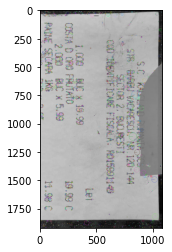

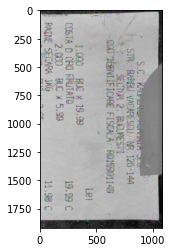

In [7]:
im1 = image_pre.copy()
im2 = image_post.copy()

kp_img1 = cv2.drawKeypoints(image_pre_gray, kp1, image_pre, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
kp_img2 = cv2.drawKeypoints(image_post_gray, kp2, image_post, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(kp_img1),plt.show()
plt.imshow(kp_img2),plt.show()

WRITE_IMAGES = False
if WRITE_IMAGES:
    cv2.imwrite('img1-kp.jpg', kp_img1)
    cv2.imwrite('img2-kp.jpg', kp_img2)

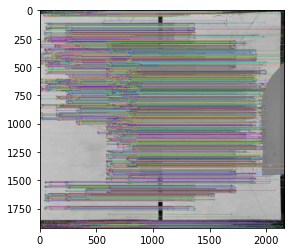

In [8]:
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(ds1, ds2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
        
match_res = cv2.drawMatchesKnn(image_pre, kp1, 
                               image_post, kp2, 
                               good, None, 
                               flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(match_res), plt.show()

WRITE_RESULT = False
if WRITE_RESULT:
    cv2.imwrite('match-res.jpg', match_res)
    
#print(matches)
#print(matches[0][0].distance)

[[ 1.00012657e+00  3.38843845e-05 -2.11355809e-02]
 [ 4.46522272e-04  9.99763673e-01  2.82581534e-01]
 [ 1.92302233e-07 -3.73648643e-08  1.00000000e+00]]
[[0]
 [0]
 [1]]
[[   0]
 [1080]
 [   1]]
[[-0.02113558]
 [ 0.28258153]
 [ 1.        ]]
[[1.54595544e-02]
 [1.08002735e+03]
 [9.99959646e-01]]


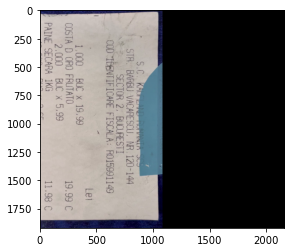

In [27]:
pts1 = np.zeros((len(matches), 2), dtype=np.float32)
pts2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    pts1[i,:] = kp1[match[0].queryIdx].pt
    pts2[i,:] = kp2[match[0].trainIdx].pt
    
h, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC)

print(h)

dims = np.shape(image_post)
bnd1 = np.array([[0,0,1]]).T
bnd2 = np.array([[0,dims[1],1]]).T
print(bnd1)
print(bnd2)
bnds1 = np.matmul(h,bnd1)
bnds2 = np.matmul(h,bnd2)
print(bnds1)
print(bnds2)

height,width,color = image_pre.shape
im_reg = cv2.warpPerspective(im2, h, ((im2.shape[1] + im1.shape[1]), im1.shape[0]))
plt.imshow(im_reg), plt.show()

WRITE_IMAGE = True
if WRITE_IMAGE:
    cv2.imwrite('registered-1-2.jpg', im_reg)

TypeError: Image data of dtype object cannot be converted to float

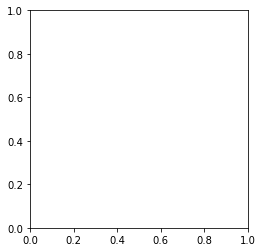

In [29]:
plt.imshow(np.real(stitched))